In [11]:
from datasets import load_from_disk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset from disk
loaded_dataset_dict = load_from_disk("/home/devadmin/LLMOPS/Ashraf/OTNVIDIA340")

# Accessing the 'eval' split
loaded_dataset = loaded_dataset_dict["eval"]

# Convert to pandas DataFrame
df = loaded_dataset.to_pandas()

# Assuming similar datasets are available, load them in a list
# Replace the paths with actual paths to other datasets
dataset_paths = [
    "/home/devadmin/LLMOPS/Ashraf/OTLLAMA38B",
    "/home/devadmin/LLMOPS/Ashraf/OTLLAMA370B",
    "/home/devadmin/LLMOPS/Ashraf/OTLLAMA405B",
    "/home/devadmin/LLMOPS/Ashraf/OTMISTRAL7B3",
    "/home/devadmin/LLMOPS/Ashraf/OTMISTRAL7B2",
    "/home/devadmin/LLMOPS/Ashraf/OTllama38",
    "/home/devadmin/LLMOPS/Ashraf/OUTgemma227",
    "/home/devadmin/LLMOPS/Ashraf/OUTgoogle7",
    "/home/devadmin/LLMOPS/Ashraf/OTLLAMA270",
    "/home/devadmin/LLMOPS/Ashraf/OUTmistral7",
    "/home/devadmin/LLMOPS/Ashraf/OTLLAMA70",
    "/home/devadmin/LLMOPS/Ashraf/OTQwen72",
    "/home/devadmin/LLMOPS/Ashraf/OTPHI3",
    "/home/devadmin/LLMOPS/Ashraf/OTWIZARD822",
    "/home/devadmin/LLMOPS/Ashraf/OTOPENCHAT8",
    "/home/devadmin/LLMOPS/Ashraf/OTlzlv70",
    "/home/devadmin/LLMOPS/Ashraf/OTDatabricks",
    "/home/devadmin/LLMOPS/Ashraf/OTzephyr141",
    "/home/devadmin/LLMOPS/Ashraf/OTMIXTRAL822",
    "/home/devadmin/LLMOPS/Ashraf/OTYI34",
    "/home/devadmin/LLMOPS/Ashraf/OTllava7",
    "/home/devadmin/LLMOPS/Ashraf/OTGPT3.5"
]

# Load and process each dataset
model_dfs = []
for path in dataset_paths:
    loaded_dataset = load_from_disk(path)["eval"]
    model_df = loaded_dataset.to_pandas()
    model_df['identifier'] = range(1, len(model_df) + 1)
    score_columns = ['relevance_scores', 'completeness_scores', 'grammar_and_style_scores', 'technical_accuracy_scores', 'openxml_structure_scores']
    model_df['average_score_per_row'] = model_df[score_columns].mean(axis=1)
    model_dfs.append(model_df)

# Add the initial dataset to the list
model_dfs.append(df)

# Combine all DataFrames into one
combined_df = pd.concat(model_dfs, ignore_index=True)

# Verify the combined DataFrame
print(combined_df['model_name'].value_counts())


model_name
mistralai/Mistral-7B-Instruct-v0.3                 66
meta-llama/Meta-Llama-3.1-8B-Instruct              33
meta-llama/Meta-Llama-3.1-70B-Instruct             33
meta-llama/Meta-Llama-3.1-405B-Instruct            33
mistralai/Mistral-7B-Instruct-v0.2                 33
meta-llama/Meta-Llama-3-8B-Instruct                33
google/gemma-2-27b-it                              33
google/gemma-1.1-7b-it                             33
meta-llama/Llama-2-70b-chat-hf                     33
meta-llama/Meta-Llama-3-70B-Instruct               33
Qwen/Qwen2-72B-Instruct                            33
microsoft/Phi-3-medium-4k-instruct                 33
microsoft/WizardLM-2-8x22B                         33
openchat/openchat-3.6-8b                           33
lizpreciatior/lzlv_70b_fp16_hf                     33
cognitivecomputations/dolphin-2.9.1-llama-3-70b    33
HuggingFaceH4/zephyr-orpo-141b-A35b-v0.1           33
mistralai/Mixtral-8x22B-Instruct-v0.1              33
01-ai/Yi-34B-Chat

<Figure size 1200x800 with 0 Axes>

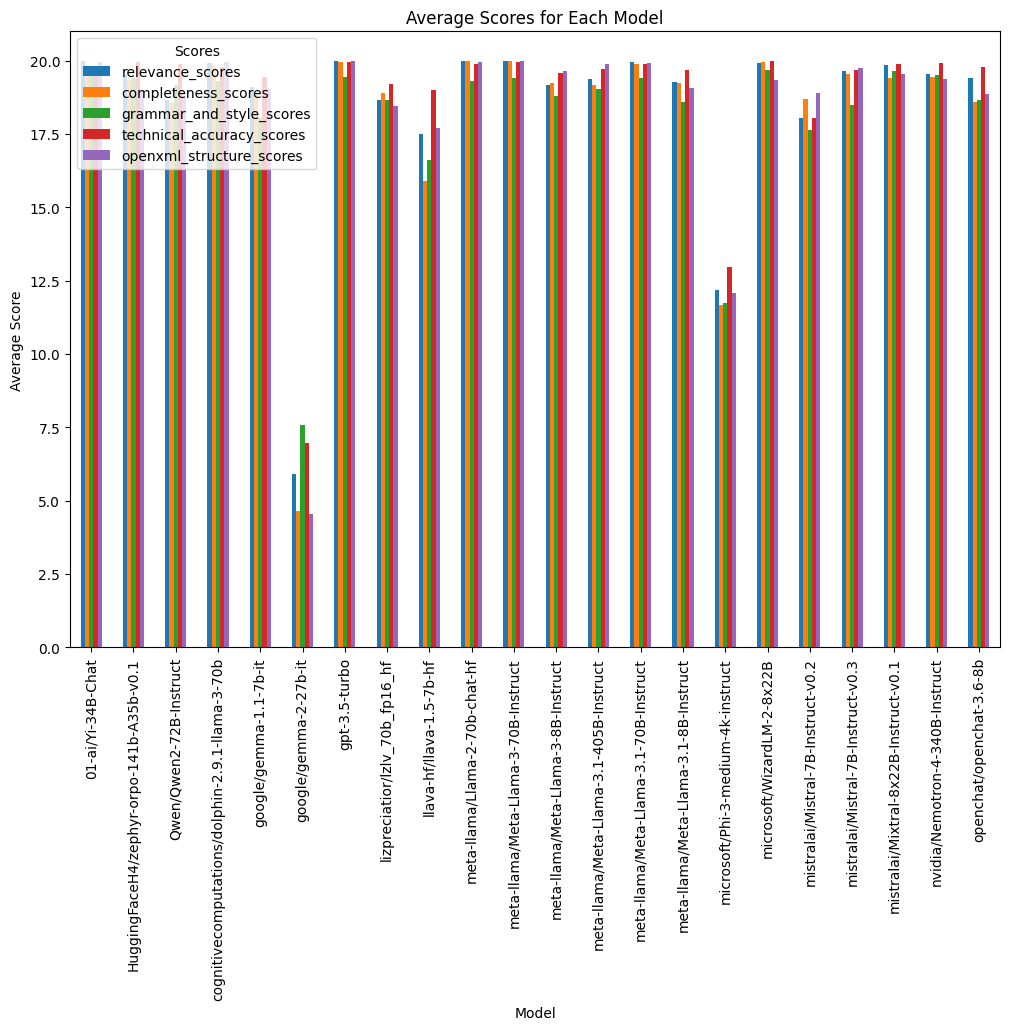

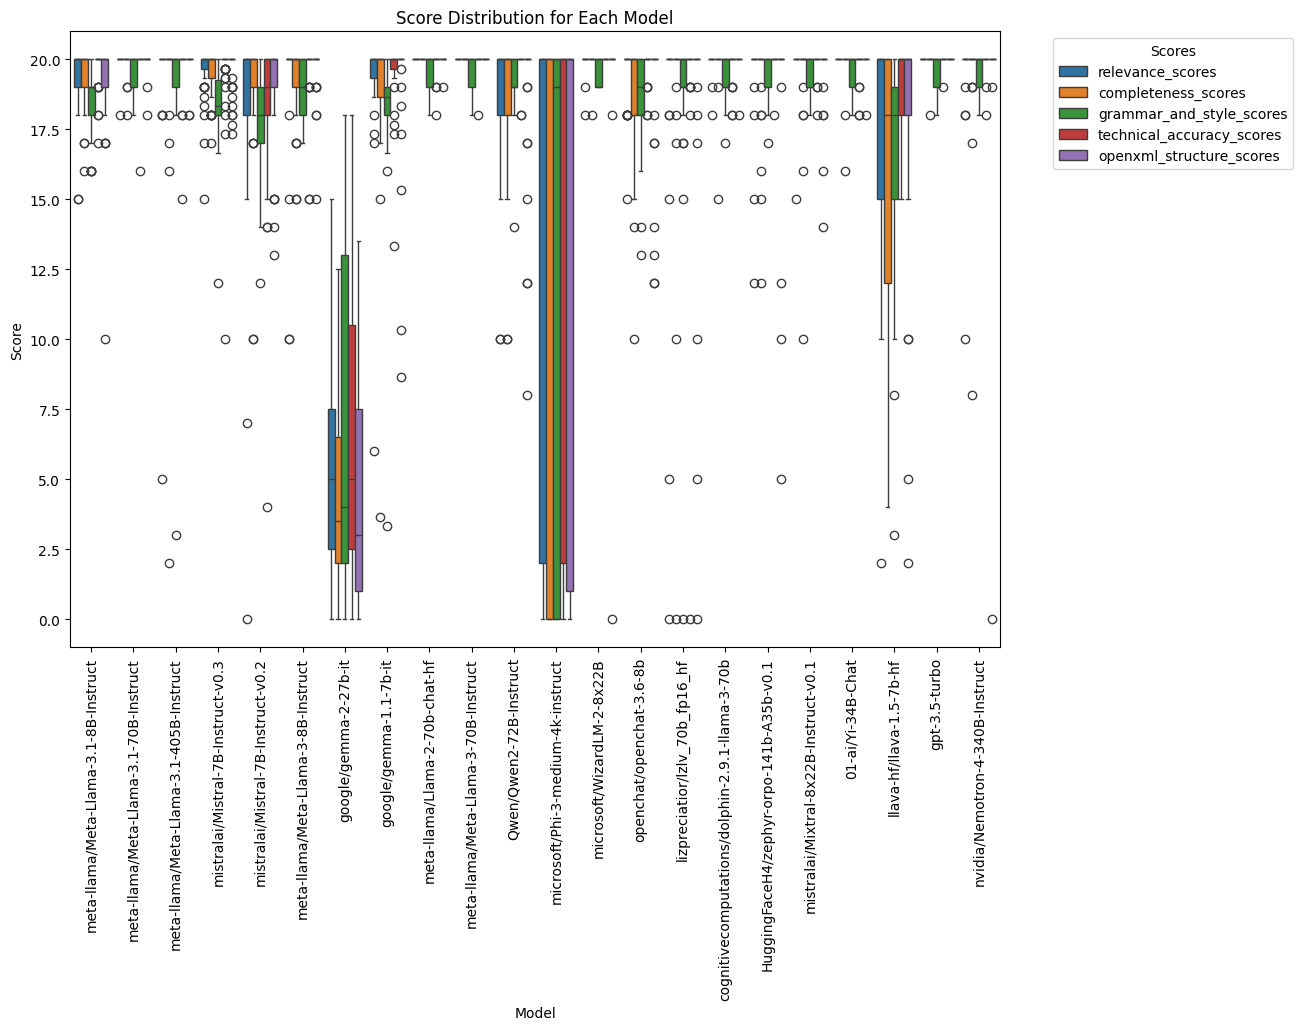

In [12]:
# Define the score columns
score_columns = ['relevance_scores', 'completeness_scores', 'grammar_and_style_scores', 'technical_accuracy_scores', 'openxml_structure_scores']

# Calculate average scores for each model
model_averages = combined_df.groupby('model_name')[score_columns].mean().reset_index()

# Bar plot for average scores of each model
plt.figure(figsize=(12, 8))
model_averages.plot(kind='bar', x='model_name', figsize=(12, 8))
plt.title('Average Scores for Each Model')
plt.ylabel('Average Score')
plt.xlabel('Model')
plt.xticks(rotation=90)
plt.legend(title='Scores')
plt.show()

# Box plot for score distribution for each model
plt.figure(figsize=(12, 8))
combined_df_melted = combined_df.melt(id_vars=['model_name'], value_vars=score_columns, var_name='Score Type', value_name='Score')
sns.boxplot(x='model_name', y='Score', hue='Score Type', data=combined_df_melted)
plt.title('Score Distribution for Each Model')
plt.ylabel('Score')
plt.xlabel('Model')
plt.xticks(rotation=90)
plt.legend(title='Scores', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [13]:
# Define the score columns
score_columns = ['relevance_scores', 'completeness_scores', 'grammar_and_style_scores', 'technical_accuracy_scores', 'openxml_structure_scores']

# Calculate average scores for each model
model_averages = combined_df.groupby('model_name')[score_columns].mean()

# Calculate global average score for each model
model_averages['global_average_score'] = model_averages.mean(axis=1)

# Reset index to make 'model_name' a column
model_averages = model_averages.reset_index()

# Sort models by global average score
model_averages = model_averages.sort_values(by='global_average_score', ascending=False)

model_averages


,model_name,relevance_scores,completeness_scores,grammar_and_style_scores,technical_accuracy_scores,openxml_structure_scores,global_average_score
10,meta-llama/Meta-Llama-3-70B-Instruct,20.000000,20.000000,19.424242,19.939394,20.000000,19.872727
6,gpt-3.5-turbo,20.000000,19.939394,19.454545,19.969697,20.000000,19.872727
0,01-ai/Yi-34B-Chat,20.000000,19.818182,19.666667,19.818182,19.939394,19.848485
9,meta-llama/Llama-2-70b-chat-hf,20.000000,20.000000,19.303030,19.878788,19.969697,19.830303
13,meta-llama/Meta-Llama-3.1-70B-Instruct,19.939394,19.878788,19.424242,19.878788,19.909091,19.806061
16,microsoft/WizardLM-2-8x22B,19.909091,19.939394,19.696970,20.000000,19.333333,19.775758
3,cognitivecomputations/dolphin-2.9.1-llama-3-70b,19.909091,19.818182,19.303030,19.787879,19.939394,19.751515
19,mistralai/Mixtral-8x22B-Instruct-v0.1,19.848485,19.424242,19.636364,19.878788,19.545455,19.666667
20,nvidia/Nemotron-4-340B-Instruct,19.545455,19.454545,19.515152,19.909091,19.363636,19.557576
12,meta-llama/Meta-Llama-3.1-405B-Instruct,19.363636,19.181818,19.030303,19.727273,19.878788,19.436364


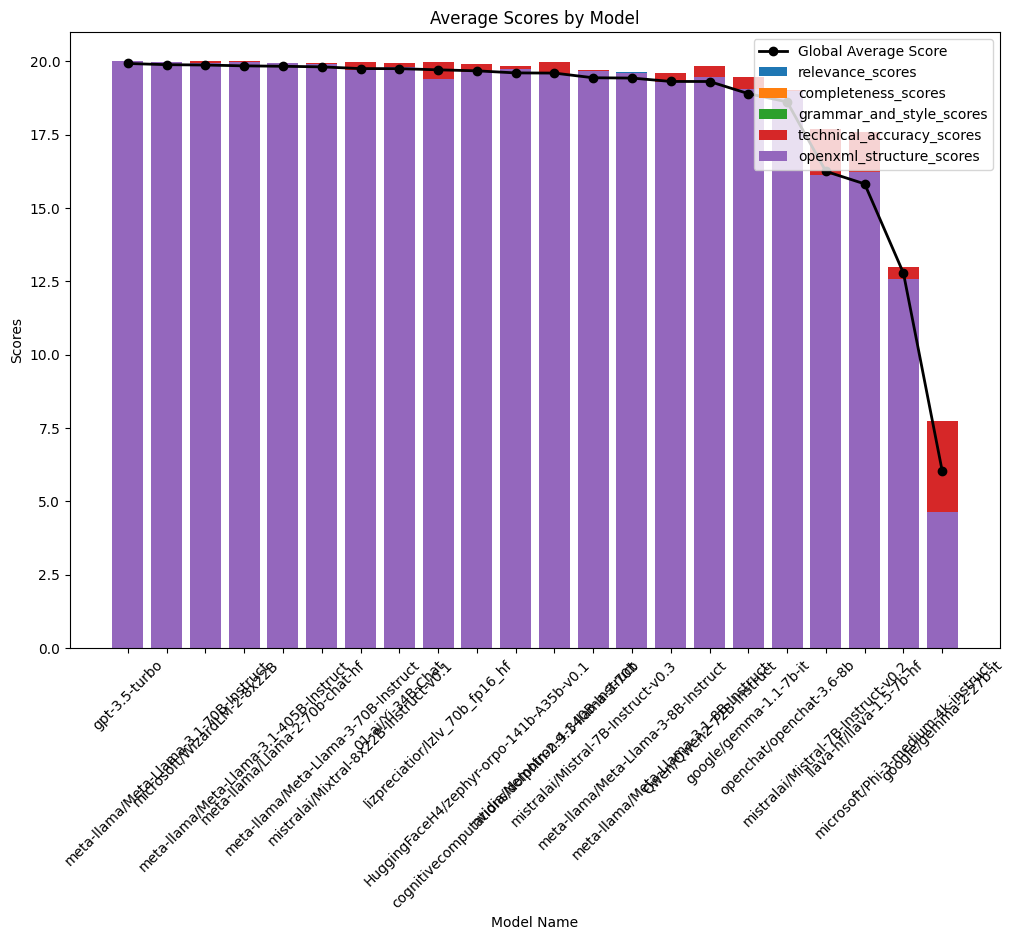

'/home/devadmin/LLMOPS/model_averages_graph.png'

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the score columns
score_columns = [
    'relevance_scores', 'completeness_scores', 
    'grammar_and_style_scores', 'technical_accuracy_scores', 
    'openxml_structure_scores'
]

# Calculate average scores for each model
model_averages = combined_df.groupby('model_name')[score_columns].mean()

# Calculate global average score for each model
model_averages['global_average_score'] = model_averages.mean(axis=1)

# Reset index to make 'model_name' a column
model_averages = model_averages.reset_index()

# Sort models by global average score
model_averages = model_averages.sort_values(by='global_average_score', ascending=False)

# Plotting the graph
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting each score category
for score in score_columns:
    ax.bar(model_averages['model_name'], model_averages[score], label=score)

# Plotting the global average score
ax.plot(model_averages['model_name'], model_averages['global_average_score'], color='black', marker='o', linestyle='-', linewidth=2, label='Global Average Score')

# Adding labels and title
ax.set_xlabel('Model Name')
ax.set_ylabel('Scores')
ax.set_title('Average Scores by Model')
ax.legend()

# Rotate the x labels for better readability
plt.xticks(rotation=45)

# Save the plot as an image
image_path = "/home/devadmin/LLMOPS/model_averages_graph.png"
plt.savefig(image_path, bbox_inches='tight', dpi=300)

plt.show()

image_path


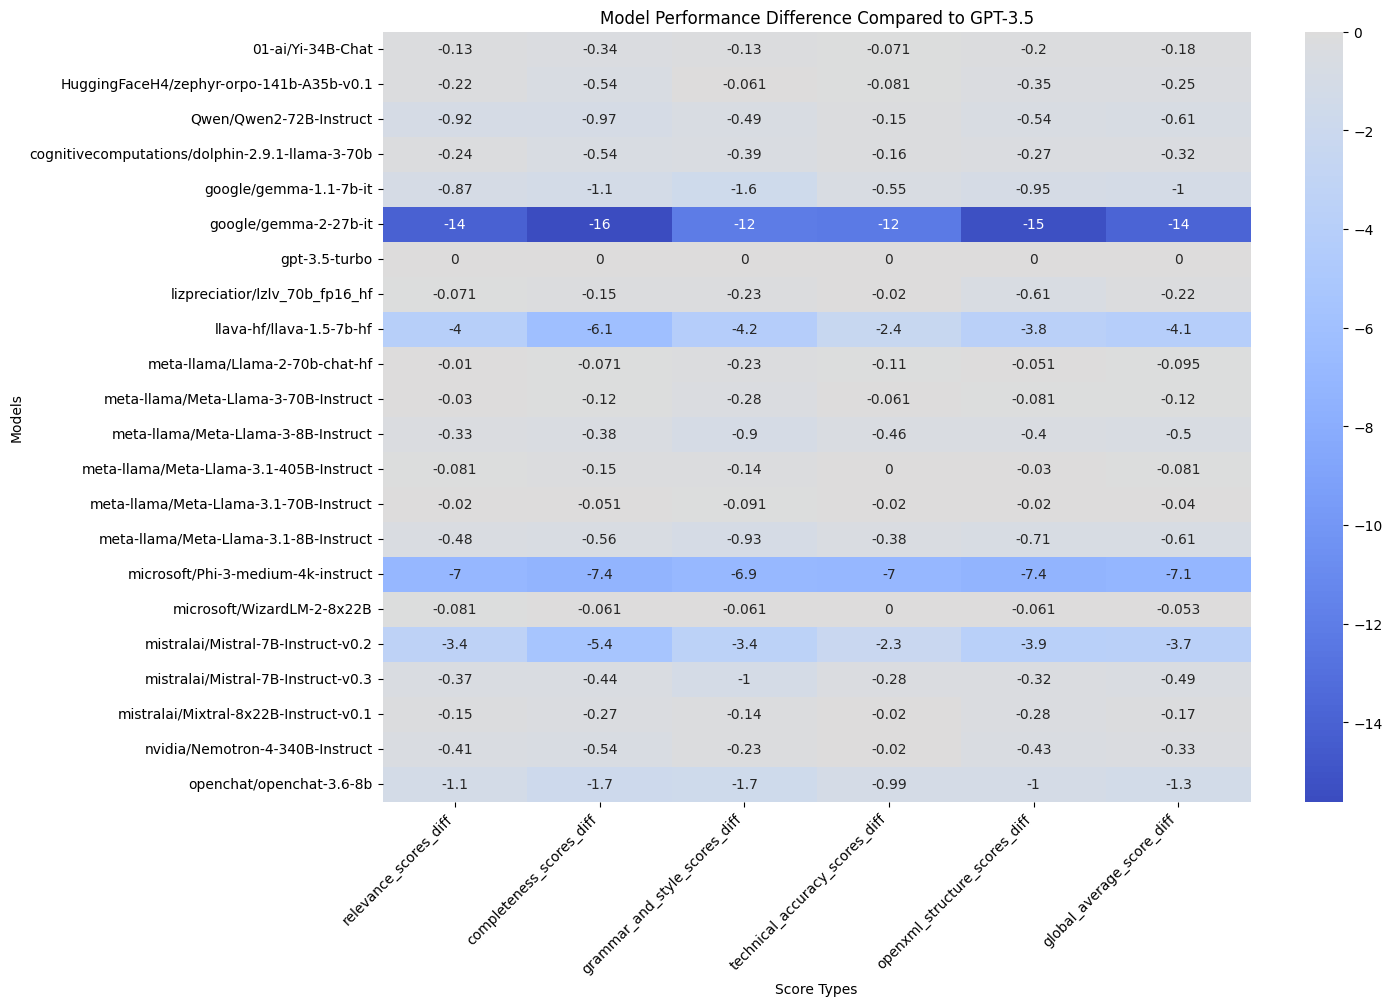

In [15]:
from datasets import load_from_disk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset from disk
loaded_dataset_dict = load_from_disk("/home/devadmin/LLMOPS/Ashraf/OUTNVIDIA340")

# Accessing the 'eval' split
loaded_dataset = loaded_dataset_dict["eval"]

# Convert to pandas DataFrame
df = loaded_dataset.to_pandas()

# Assuming similar datasets are available, load them in a list
dataset_paths = [
    "/home/devadmin/LLMOPS/Ashraf/OUTLLAMA38B",
    "/home/devadmin/LLMOPS/Ashraf/LLAMA370B",
    "/home/devadmin/LLMOPS/Ashraf/OUTLLAMA405B",
    "/home/devadmin/LLMOPS/Ashraf/OUTMISTRAL7B3",
    "/home/devadmin/LLMOPS/Ashraf/OUTMISTRAL7B2",
    "/home/devadmin/LLMOPS/Ashraf/OUTllama38",
    "/home/devadmin/LLMOPS/Ashraf/OUTgemma227",
    "/home/devadmin/LLMOPS/Ashraf/OUTgoogle7",
    "/home/devadmin/LLMOPS/Ashraf/OUTLLAMA270",
    "/home/devadmin/LLMOPS/Ashraf/OUTmistral7",
    "/home/devadmin/LLMOPS/Ashraf/OUTLLAMA70",
    "/home/devadmin/LLMOPS/Ashraf/OUTQwen72",
    "/home/devadmin/LLMOPS/Ashraf/OUTPHI3",
    "/home/devadmin/LLMOPS/Ashraf/OUTWIZARD822",
    "/home/devadmin/LLMOPS/Ashraf/OUTOPENCHAT8",
    "/home/devadmin/LLMOPS/Ashraf/OUTlzlv70",
    "/home/devadmin/LLMOPS/Ashraf/OUTDatabricks",
    "/home/devadmin/LLMOPS/Ashraf/OUTzephyr141",
    "/home/devadmin/LLMOPS/Ashraf/OUTMIXTRAL822",
    "/home/devadmin/LLMOPS/Ashraf/OUTYI34",
    "/home/devadmin/LLMOPS/Ashraf/OUTllava7",
    "/home/devadmin/LLMOPS/Ashraf/OUTGPT3.5"
]

# Load and process each dataset
model_dfs = []
for path in dataset_paths:
    loaded_dataset = load_from_disk(path)["eval"]
    model_df = loaded_dataset.to_pandas()
    model_df['identifier'] = range(1, len(model_df) + 1)
    score_columns = ['relevance_scores', 'completeness_scores', 'grammar_and_style_scores', 'technical_accuracy_scores', 'openxml_structure_scores']
    model_df['average_score_per_row'] = model_df[score_columns].mean(axis=1)
    model_dfs.append(model_df)

# Add the initial dataset to the list
model_dfs.append(df)

# Combine all DataFrames into one
combined_df = pd.concat(model_dfs, ignore_index=True)


# Define the score columns
score_columns = ['relevance_scores', 'completeness_scores', 'grammar_and_style_scores', 'technical_accuracy_scores', 'openxml_structure_scores']

# Calculate average scores for each model
model_averages = combined_df.groupby('model_name')[score_columns].mean()

# Calculate global average score for each model
model_averages['global_average_score'] = model_averages.mean(axis=1)

# Reset index to make 'model_name' a column
model_averages = model_averages.reset_index()

# Find the GPT-3.5 scores
gpt35_scores = model_averages[model_averages['model_name'] == 'gpt-3.5-turbo']

# Calculate differences from GPT-3.5 scores
for score in score_columns + ['global_average_score']:
    model_averages[f'{score}_diff'] = model_averages[score] - gpt35_scores[score].values[0]

# Select only the columns with differences
diff_columns = [f'{score}_diff' for score in score_columns + ['global_average_score']]
diff_df = model_averages[['model_name'] + diff_columns]

# Set the model_name as the index for better heatmap visualization
diff_df.set_index('model_name', inplace=True)

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(diff_df, annot=True, cmap='coolwarm', center=0)
plt.title('Model Performance Difference Compared to GPT-3.5')
plt.xlabel('Score Types')
plt.ylabel('Models')
plt.xticks(rotation=45, ha='right')
plt.show()


model_name
mistralai/Mistral-7B-Instruct-v0.3                 66
mistralai/Mistral-7B-Instruct-v0.2                 33
meta-llama/Meta-Llama-3-8B-Instruct                33
google/gemma-2-27b-it                              33
google/gemma-1.1-7b-it                             33
meta-llama/Llama-2-70b-chat-hf                     33
meta-llama/Meta-Llama-3-70B-Instruct               33
Qwen/Qwen2-72B-Instruct                            33
microsoft/Phi-3-medium-4k-instruct                 33
microsoft/WizardLM-2-8x22B                         33
openchat/openchat-3.6-8b                           33
lizpreciatior/lzlv_70b_fp16_hf                     33
cognitivecomputations/dolphin-2.9.1-llama-3-70b    33
HuggingFaceH4/zephyr-orpo-141b-A35b-v0.1           33
mistralai/Mixtral-8x22B-Instruct-v0.1              33
01-ai/Yi-34B-Chat                                  33
llava-hf/llava-1.5-7b-hf                           33
gpt-3.5-turbo                                      33
nvidia/Nemotron-4

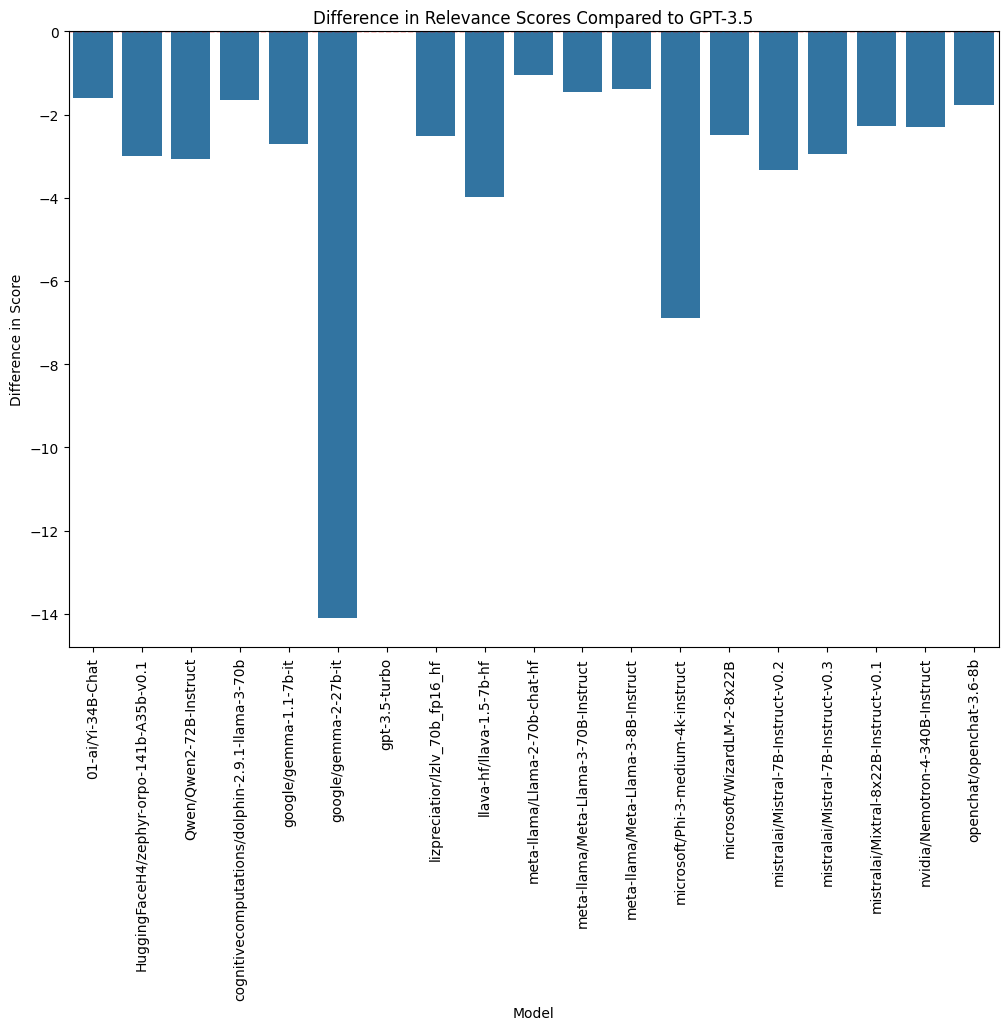

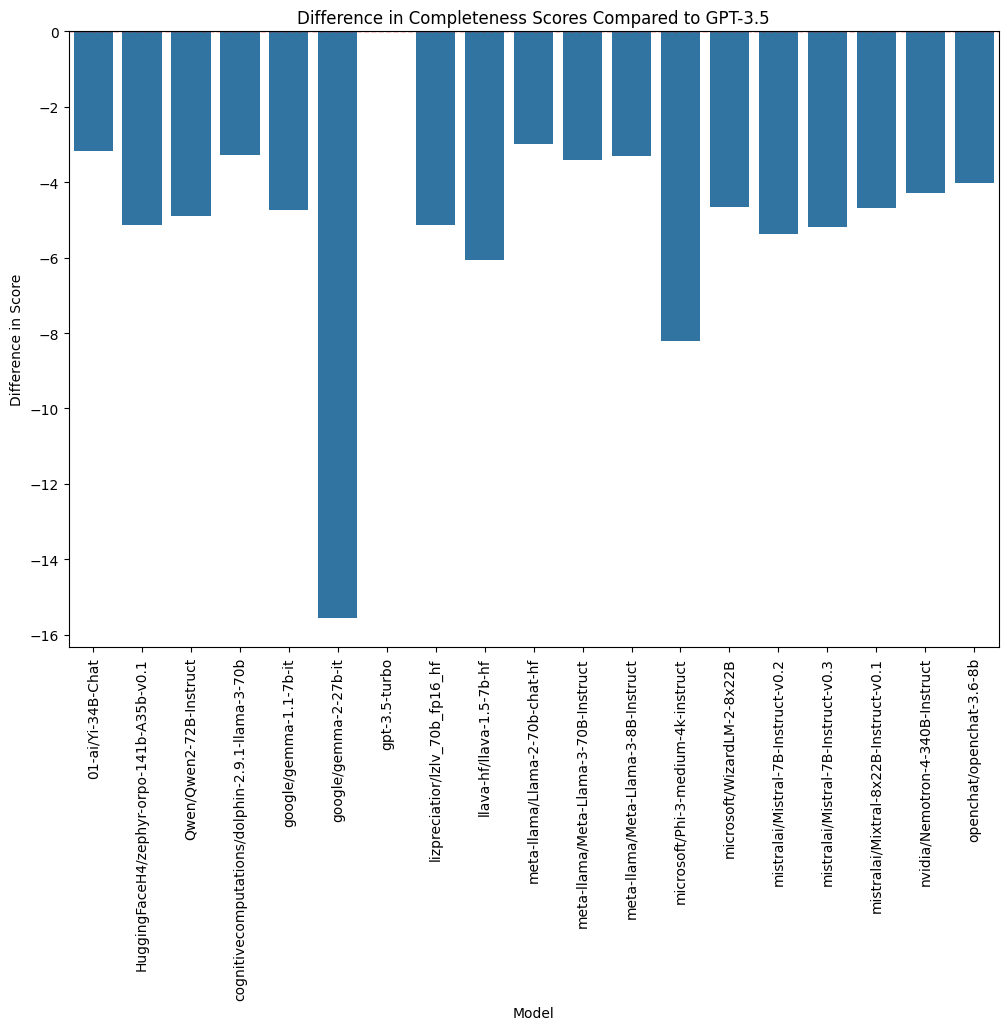

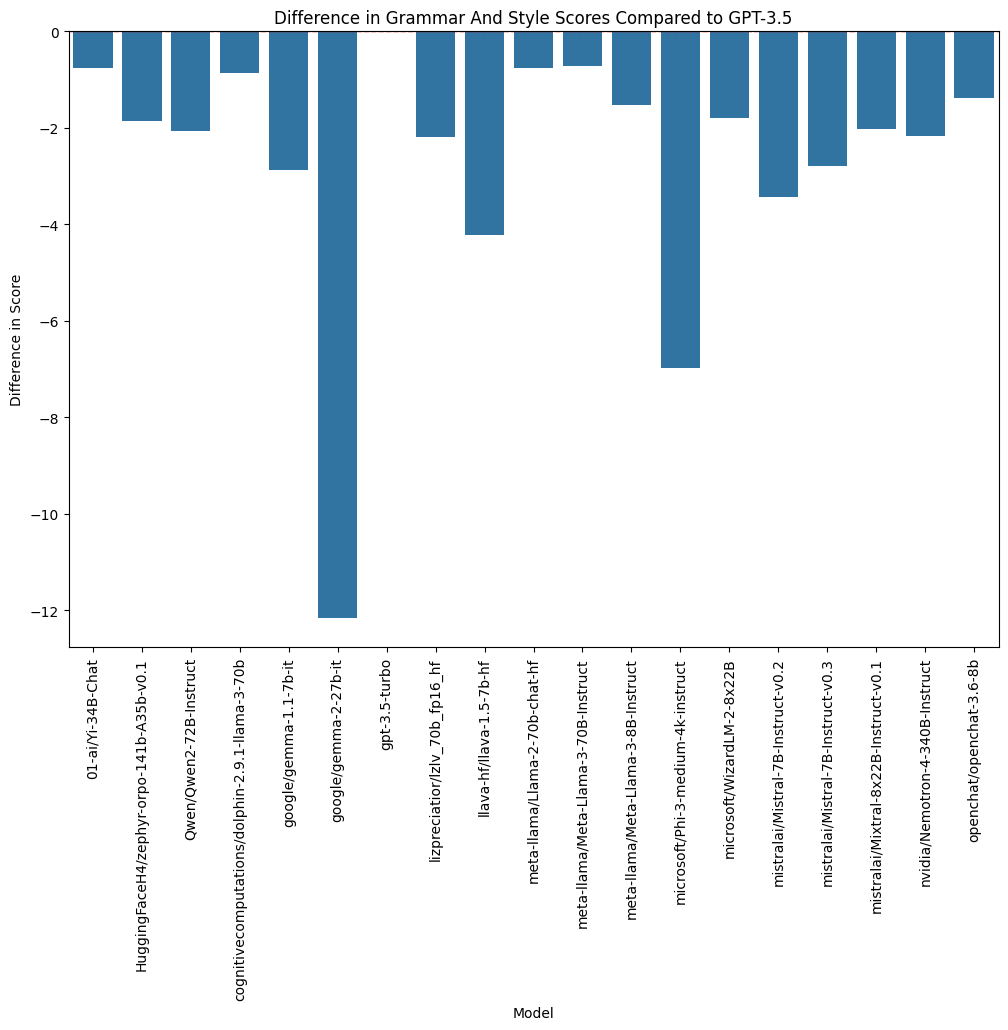

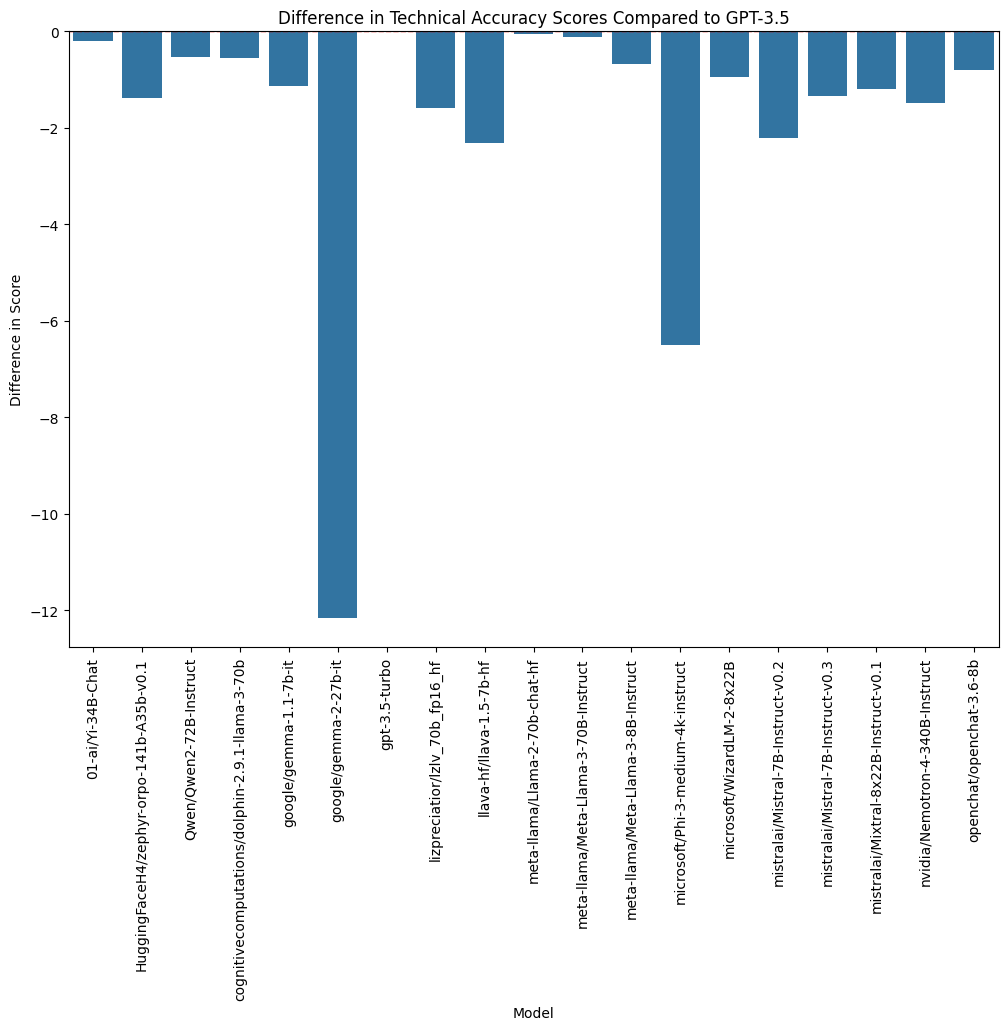

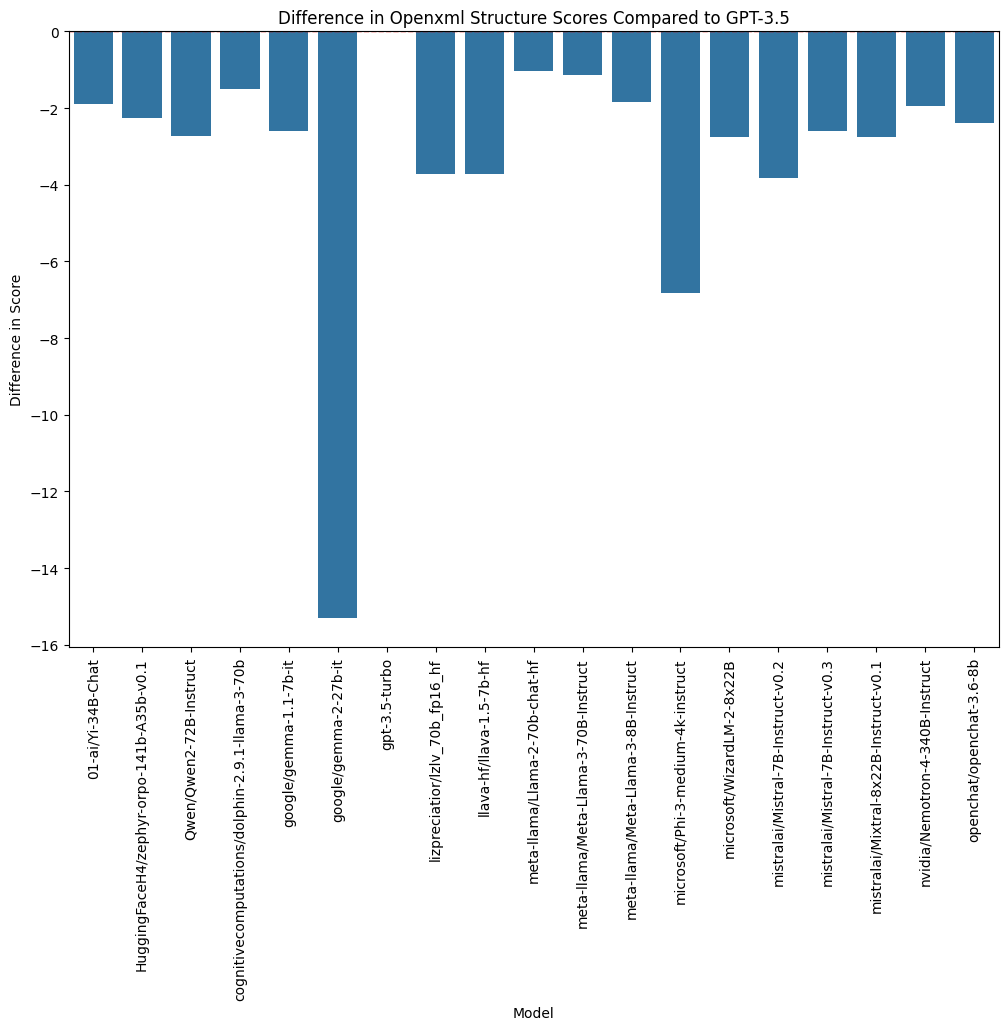

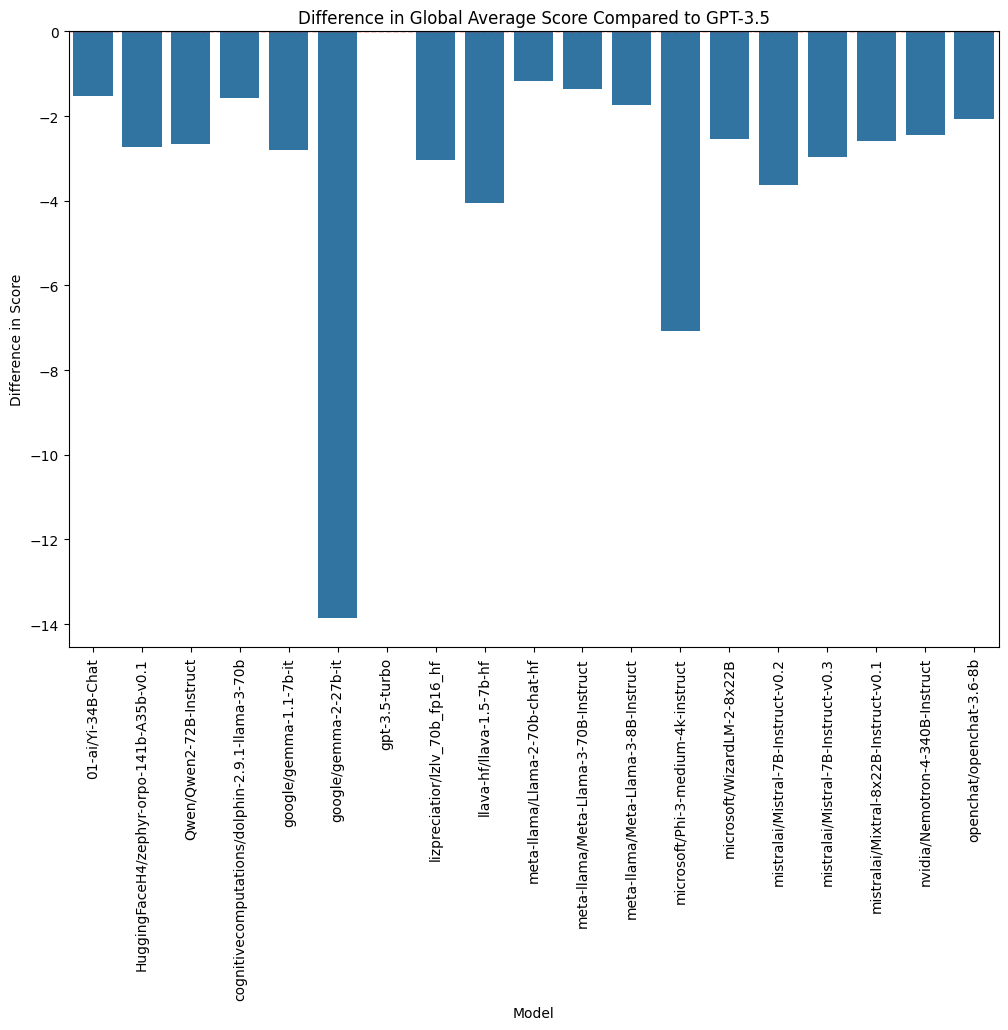

In [8]:
from datasets import load_from_disk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset from disk
loaded_dataset_dict = load_from_disk("/home/devadmin/LLMOPS/Ashraf/OUTNVIDIA340")

# Accessing the 'eval' split
loaded_dataset = loaded_dataset_dict["eval"]

# Convert to pandas DataFrame
df = loaded_dataset.to_pandas()

# Assuming similar datasets are available, load them in a list
dataset_paths = [
    "/home/devadmin/LLMOPS/Ashraf/OUTMISTRAL7B3",
    "/home/devadmin/LLMOPS/Ashraf/OUTMISTRAL7B2",
    "/home/devadmin/LLMOPS/Ashraf/OUTllama38",
    "/home/devadmin/LLMOPS/Ashraf/OUTgemma227",
    "/home/devadmin/LLMOPS/Ashraf/OUTgoogle7",
    "/home/devadmin/LLMOPS/Ashraf/OUTLLAMA270",
    "/home/devadmin/LLMOPS/Ashraf/OUTmistral7",
    "/home/devadmin/LLMOPS/Ashraf/OUTLLAMA70",
    "/home/devadmin/LLMOPS/Ashraf/OUTQwen72",
    "/home/devadmin/LLMOPS/Ashraf/OUTPHI3",
    "/home/devadmin/LLMOPS/Ashraf/OUTWIZARD822",
    "/home/devadmin/LLMOPS/Ashraf/OUTOPENCHAT8",
    "/home/devadmin/LLMOPS/Ashraf/OUTlzlv70",
    "/home/devadmin/LLMOPS/Ashraf/OUTDatabricks",
    "/home/devadmin/LLMOPS/Ashraf/OUTzephyr141",
    "/home/devadmin/LLMOPS/Ashraf/OUTMIXTRAL822",
    "/home/devadmin/LLMOPS/Ashraf/OUTYI34",
    "/home/devadmin/LLMOPS/Ashraf/OUTllava7",
    "/home/devadmin/LLMOPS/Ashraf/OUTGPT3.5"
]

# Load and process each dataset
model_dfs = []
for path in dataset_paths:
    loaded_dataset = load_from_disk(path)["eval"]
    model_df = loaded_dataset.to_pandas()
    model_df['identifier'] = range(1, len(model_df) + 1)
    score_columns = ['relevance_scores', 'completeness_scores', 'grammar_and_style_scores', 'technical_accuracy_scores', 'openxml_structure_scores']
    model_df['average_score_per_row'] = model_df[score_columns].mean(axis=1)
    model_dfs.append(model_df)

# Add the initial dataset to the list
model_dfs.append(df)

# Combine all DataFrames into one
combined_df = pd.concat(model_dfs, ignore_index=True)

# Verify the combined DataFrame
print(combined_df['model_name'].value_counts())

# Define the score columns
score_columns = ['relevance_scores', 'completeness_scores', 'grammar_and_style_scores', 'technical_accuracy_scores', 'openxml_structure_scores']

# Calculate average scores for each model
model_averages = combined_df.groupby('model_name')[score_columns].mean()

# Calculate global average score for each model
model_averages['global_average_score'] = model_averages.mean(axis=1)

# Reset index to make 'model_name' a column
model_averages = model_averages.reset_index()

# Find the GPT-3.5 scores
gpt35_scores = model_averages[model_averages['model_name'] == 'gpt-3.5-turbo']

# Calculate differences from GPT-3.5 scores
for score in score_columns + ['global_average_score']:
    model_averages[f'{score}_diff'] = model_averages[score] - gpt35_scores[score].values[0]

# Plot the differences for each score type
for score in score_columns + ['global_average_score']:
    plt.figure(figsize=(12, 8))
    sns.barplot(x='model_name', y=f'{score}_diff', data=model_averages)
    plt.title(f'Difference in {score.replace("_", " ").title()} Compared to GPT-3.5')
    plt.ylabel('Difference in Score')
    plt.xlabel('Model')
    plt.xticks(rotation=90)
    plt.axhline(0, color='red', linestyle='--', linewidth=1)
    plt.show()


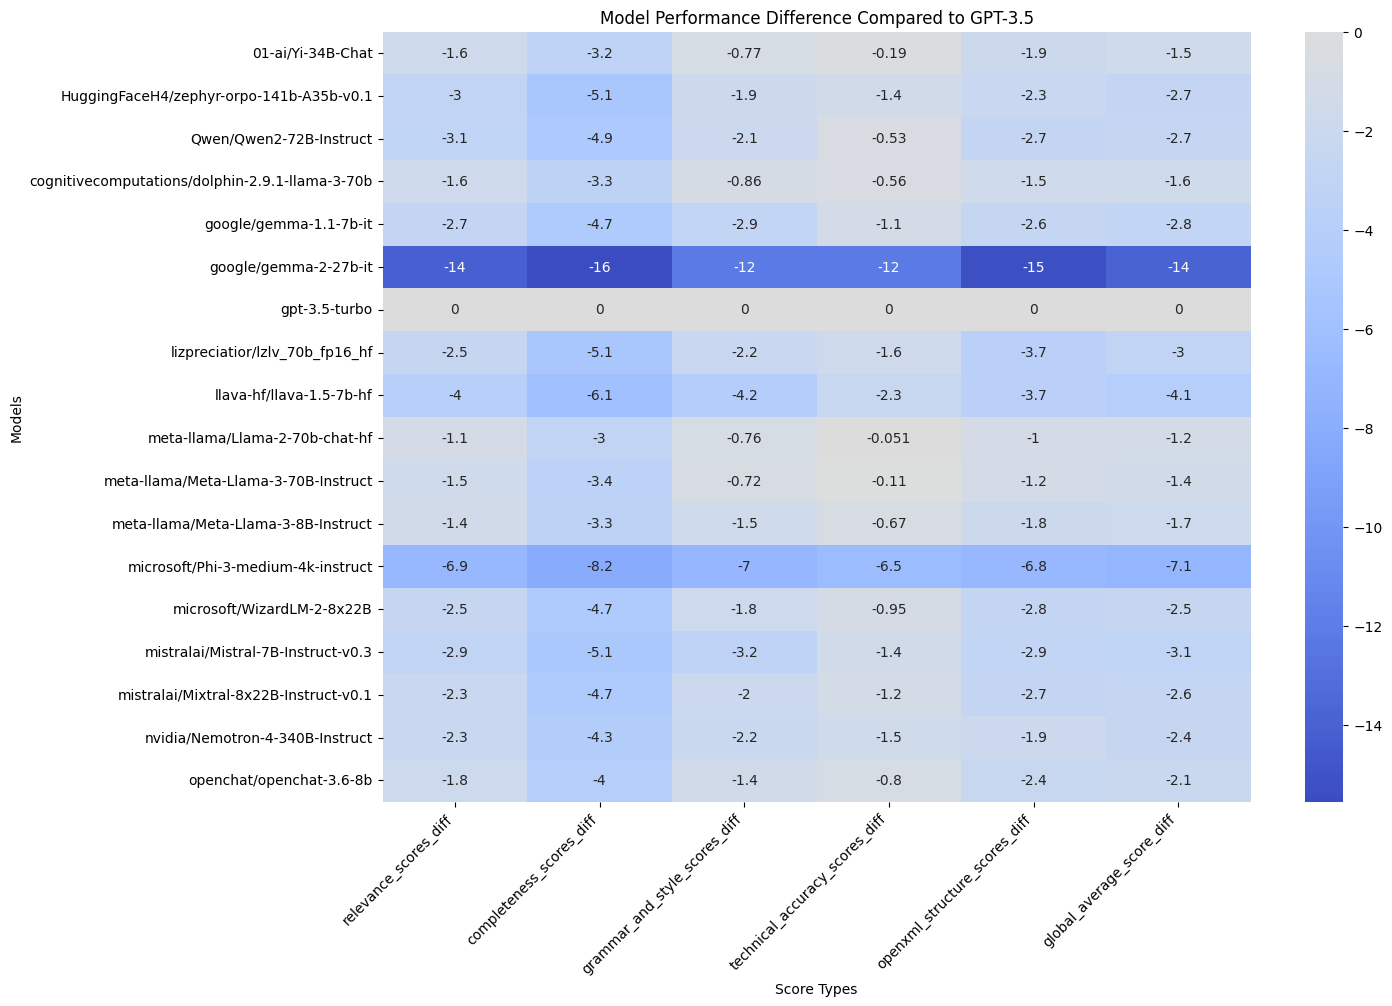

In [13]:
from datasets import load_from_disk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset from disk
loaded_dataset_dict = load_from_disk("/home/devadmin/LLMOPS/Ashraf/OUTNVIDIA340")

# Accessing the 'eval' split
loaded_dataset = loaded_dataset_dict["eval"]

# Convert to pandas DataFrame
df = loaded_dataset.to_pandas()

# Assuming similar datasets are available, load them in a list
dataset_paths = [
    "/home/devadmin/LLMOPS/Ashraf/OUTMISTRAL7B3",
    "/home/devadmin/LLMOPS/Ashraf/OUTMISTRAL7B2",
    "/home/devadmin/LLMOPS/Ashraf/OUTllama38",
    "/home/devadmin/LLMOPS/Ashraf/OUTgemma227",
    "/home/devadmin/LLMOPS/Ashraf/OUTgoogle7",
    "/home/devadmin/LLMOPS/Ashraf/OUTLLAMA270",
    "/home/devadmin/LLMOPS/Ashraf/OUTmistral7",
    "/home/devadmin/LLMOPS/Ashraf/OUTLLAMA70",
    "/home/devadmin/LLMOPS/Ashraf/OUTQwen72",
    "/home/devadmin/LLMOPS/Ashraf/OUTPHI3",
    "/home/devadmin/LLMOPS/Ashraf/OUTWIZARD822",
    "/home/devadmin/LLMOPS/Ashraf/OUTOPENCHAT8",
    "/home/devadmin/LLMOPS/Ashraf/OUTlzlv70",
    "/home/devadmin/LLMOPS/Ashraf/OUTDatabricks",
    "/home/devadmin/LLMOPS/Ashraf/OUTzephyr141",
    "/home/devadmin/LLMOPS/Ashraf/OUTMIXTRAL822",
    "/home/devadmin/LLMOPS/Ashraf/OUTYI34",
    "/home/devadmin/LLMOPS/Ashraf/OUTllava7",
    "/home/devadmin/LLMOPS/Ashraf/OUTGPT3.5"
]

# Load and process each dataset
model_dfs = []
for path in dataset_paths:
    loaded_dataset = load_from_disk(path)["eval"]
    model_df = loaded_dataset.to_pandas()
    model_df['identifier'] = range(1, len(model_df) + 1)
    score_columns = ['relevance_scores', 'completeness_scores', 'grammar_and_style_scores', 'technical_accuracy_scores', 'openxml_structure_scores']
    model_df['average_score_per_row'] = model_df[score_columns].mean(axis=1)
    model_dfs.append(model_df)

# Add the initial dataset to the list
model_dfs.append(df)

# Combine all DataFrames into one
combined_df = pd.concat(model_dfs, ignore_index=True)


# Define the score columns
score_columns = ['relevance_scores', 'completeness_scores', 'grammar_and_style_scores', 'technical_accuracy_scores', 'openxml_structure_scores']

# Calculate average scores for each model
model_averages = combined_df.groupby('model_name')[score_columns].mean()

# Calculate global average score for each model
model_averages['global_average_score'] = model_averages.mean(axis=1)

# Reset index to make 'model_name' a column
model_averages = model_averages.reset_index()

# Find the GPT-3.5 scores
gpt35_scores = model_averages[model_averages['model_name'] == 'gpt-3.5-turbo']

# Calculate differences from GPT-3.5 scores
for score in score_columns + ['global_average_score']:
    model_averages[f'{score}_diff'] = model_averages[score] - gpt35_scores[score].values[0]

# Select only the columns with differences
diff_columns = [f'{score}_diff' for score in score_columns + ['global_average_score']]
diff_df = model_averages[['model_name'] + diff_columns]

# Set the model_name as the index for better heatmap visualization
diff_df.set_index('model_name', inplace=True)

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(diff_df, annot=True, cmap='coolwarm', center=0)
plt.title('Model Performance Difference Compared to GPT-3.5')
plt.xlabel('Score Types')
plt.ylabel('Models')
plt.xticks(rotation=45, ha='right')
plt.show()


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datasets import load_from_disk
from math import pi

# Load and process data as before

# Radar Chart Preparation
def make_radar_chart(df, title, colors):
    categories = list(df)[1:]
    N = len(categories)

    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    ax = plt.subplot(111, polar=True)

    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    plt.xticks(angles[:-1], categories, color='grey', size=8)
    ax.set_rlabel_position(0)
    plt.yticks([-1, 0, 1], ["-1", "0", "1"], color="grey", size=7)
    plt.ylim(-1, 1)

    for i, (model, row) in enumerate(df.iterrows()):
        values = row.drop('model_name').values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, color=colors[i], linewidth=2, linestyle='solid', label=row['model_name'])
        ax.fill(angles, values, color=colors[i], alpha=0.25)

    plt.title(title, size=15, color=colors[0], y=1.1)
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

colors = sns.color_palette("husl", len(diff_df))
make_radar_chart(diff_df.reset_index(), 'Model Performance Differences Compared to GPT-3.5', colors)
plt.show()


/home/devadmin/miniconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NameError: name 'diff_df' is not defined

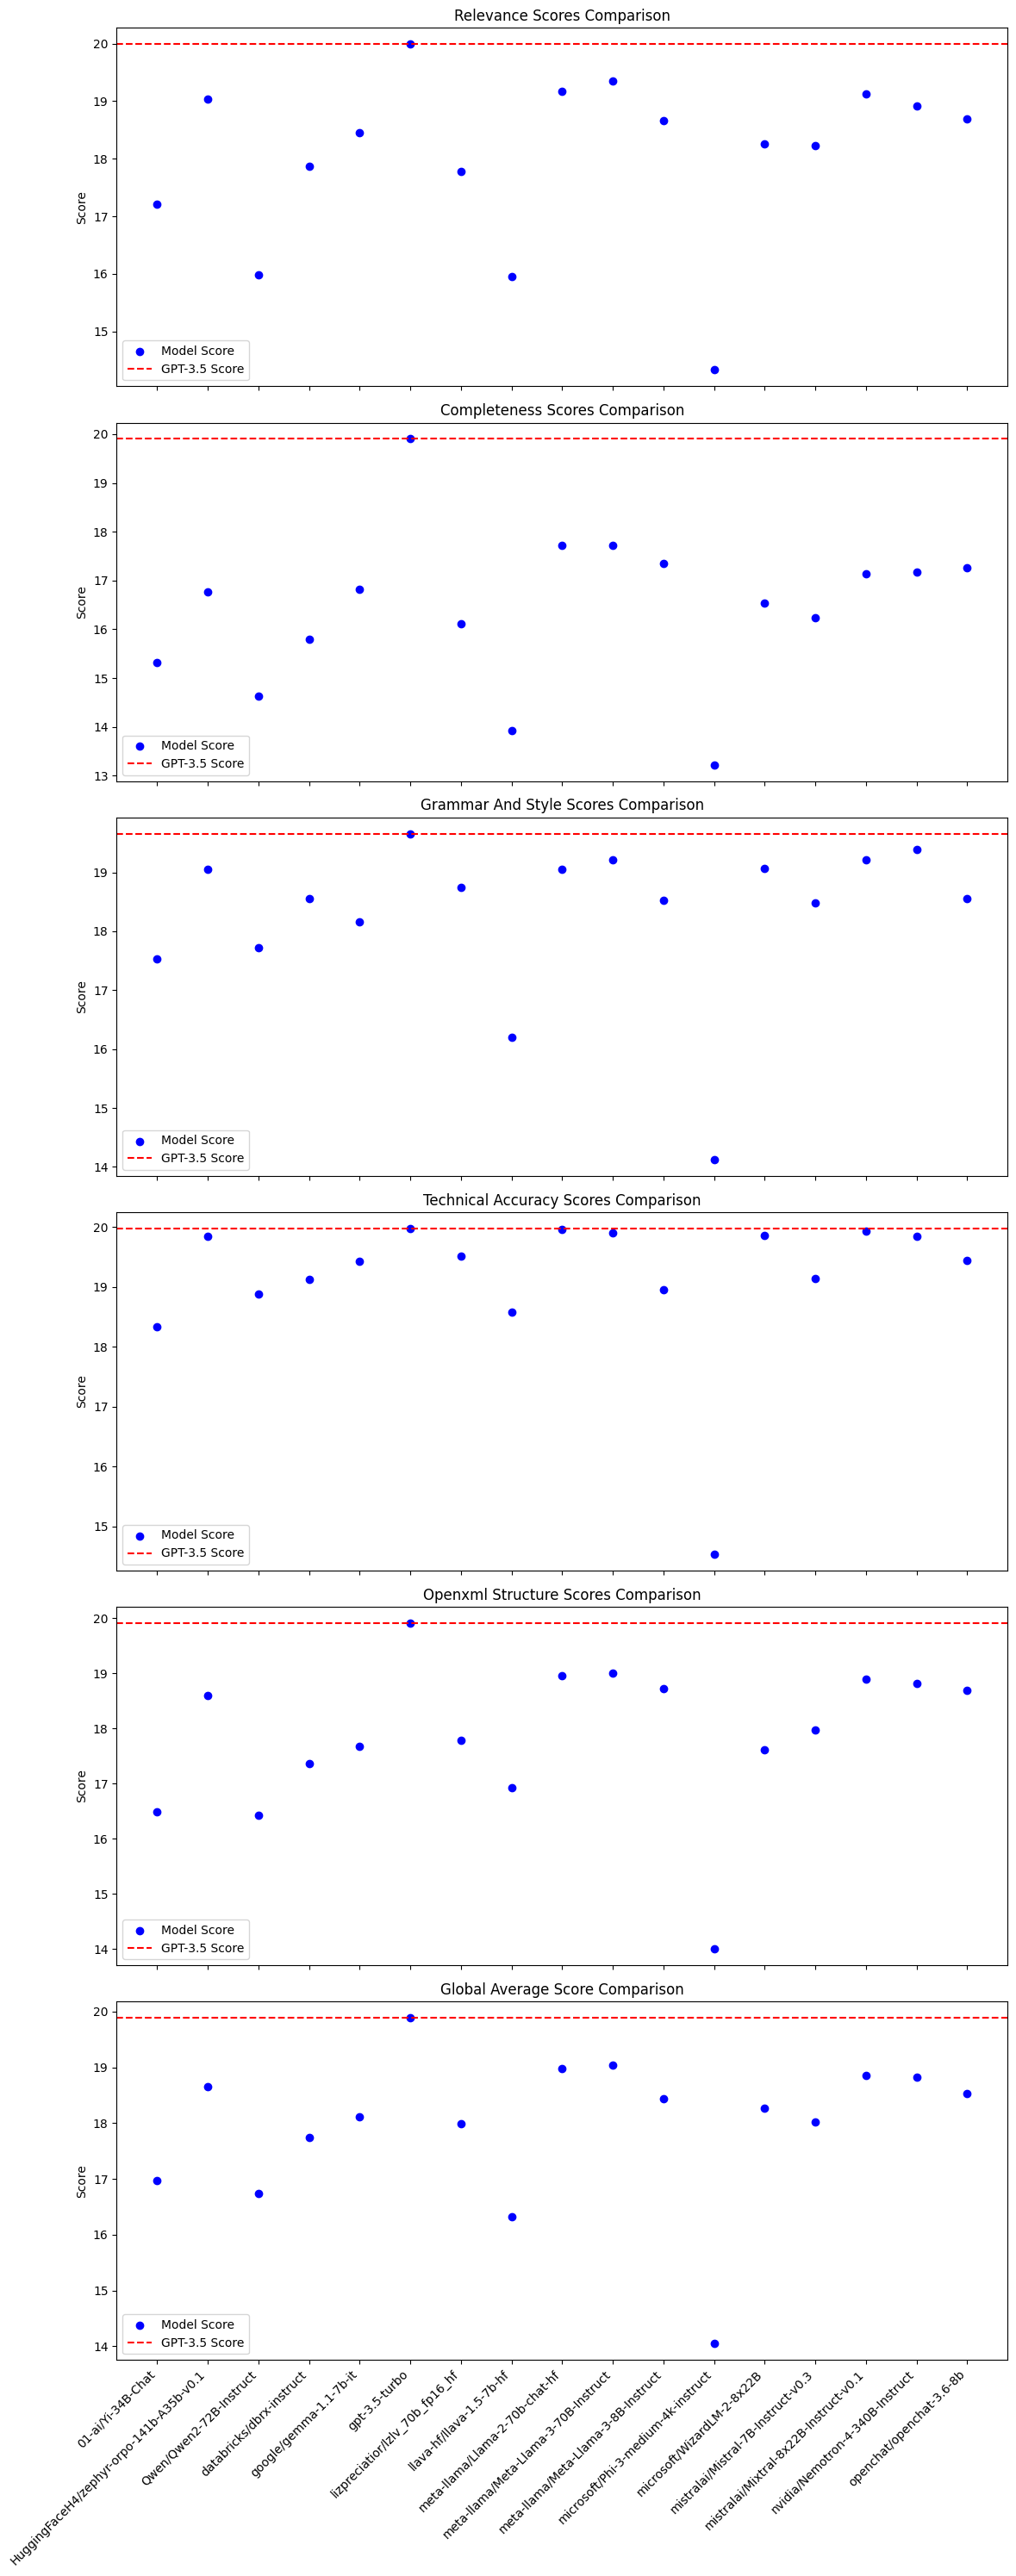

In [10]:
# Load and process data as before

# Scatter Plot with Baseline
fig, axes = plt.subplots(len(score_columns) + 1, 1, figsize=(12, 30), sharex=True)

for i, score in enumerate(score_columns + ['global_average_score']):
    axes[i].scatter(model_averages['model_name'], model_averages[score], color='blue', label='Model Score')
    axes[i].axhline(gpt35_scores[score].values[0], color='red', linestyle='--', label='GPT-3.5 Score')
    axes[i].set_title(f'{score.replace("_", " ").title()} Comparison')
    axes[i].set_ylabel('Score')
    axes[i].legend()

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


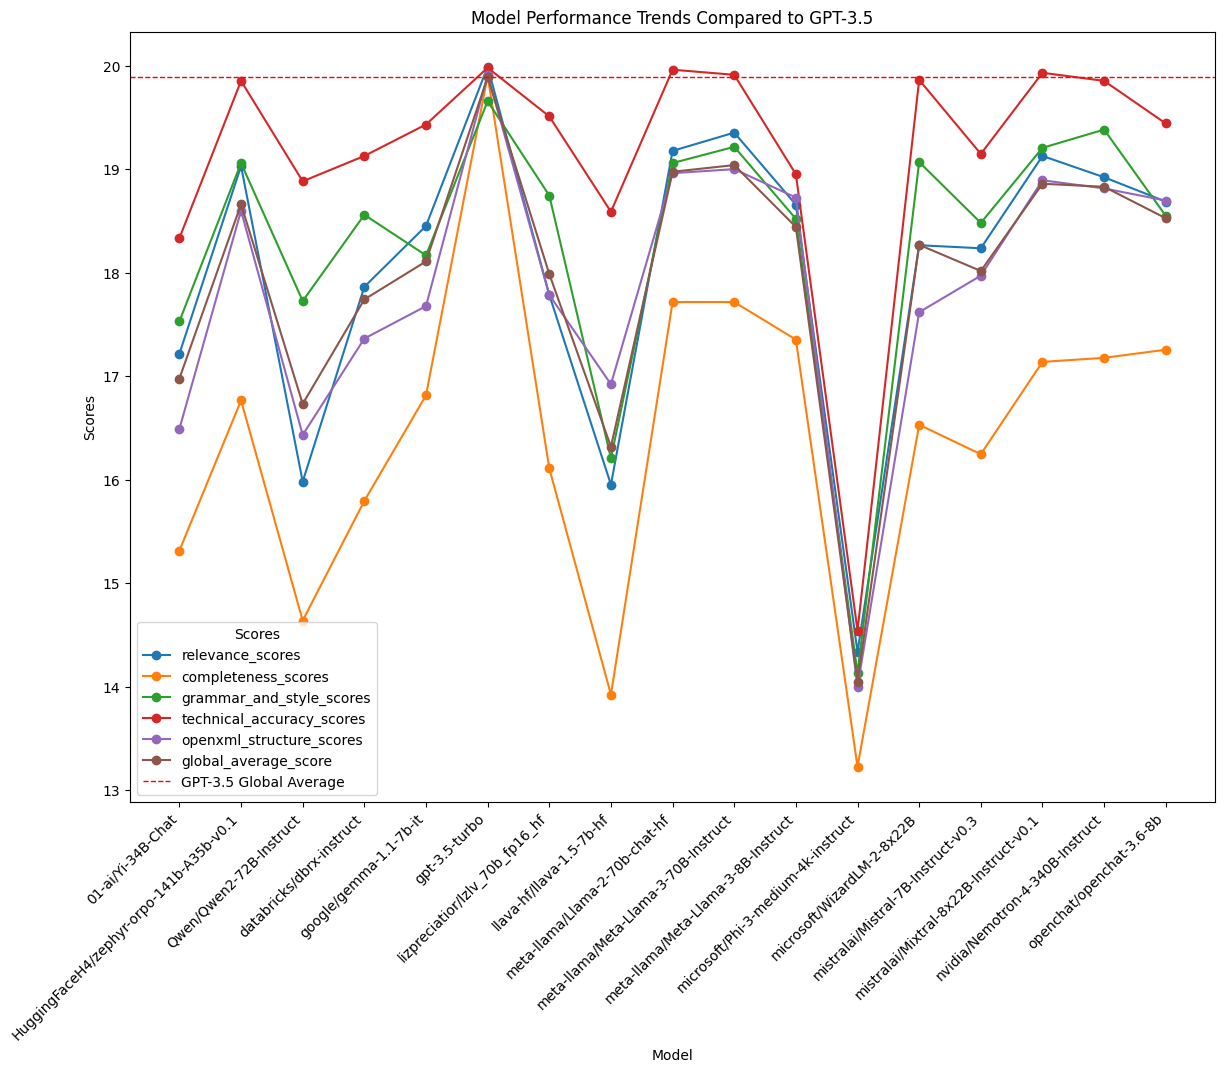

In [12]:
# Load and process data as before

# Line Plot
plt.figure(figsize=(14, 10))
for score in score_columns + ['global_average_score']:
    plt.plot(model_averages['model_name'], model_averages[score], marker='o', label=score)
plt.axhline(y=gpt35_scores['global_average_score'].values[0], color='red', linestyle='--', linewidth=1, label='GPT-3.5 Global Average')
plt.title('Model Performance Trends Compared to GPT-3.5')
plt.ylabel('Scores')
plt.xlabel('Model')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Scores')
plt.show()


In [7]:
!pip install torchdata

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.4/184.4 kB 15.8 MB/s eta 0:00:00


In [10]:
# Importation des modules nécessaires
from torchtext.datasets import AG_NEWS
import torch
from torch.utils.data import DataLoader
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
from torch import nn
from transformers import BertModel, BertTokenizer
import torch.optim as optim

# Crée un itérateur pour le jeu de données AG News avec l'ensemble d'entraînement
train_iter = iter(AG_NEWS(split='train'))

# Récupère le premier exemple du jeu de données
first_example = next(train_iter)

# Affiche le premier exemple
print(first_example)


<generator object ShardingFilterIterDataPipe.__iter__ at 0x7fa5f1740880>
